In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggkagglele/

cp: cannot create regular file '/root/.kaggkagglele/': Not a directory


In [ ]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs
License(s): CC-BY-SA-4.0
 98% 726M/740M [00:07<00:00, 113MB/s]
100% 740M/740M [00:07<00:00, 109MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/identifying-disease-in-tea-leafs.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Base Model | Variation - 08

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfl

import matplotlib.pyplot as plt

import numpy as np

%load_ext tensorboard

In [ ]:
batch_size=32
img_height=256
img_width=256

train_dir='/content/tea sickness dataset'

In [ ]:
train_ds=tfk.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    validation_split=0.1,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds=tfk.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    validation_split=0.1,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 885 files belonging to 8 classes.
Using 797 files for training.
Found 885 files belonging to 8 classes.
Using 88 files for validation.


In [ ]:
class_names = train_ds.class_names

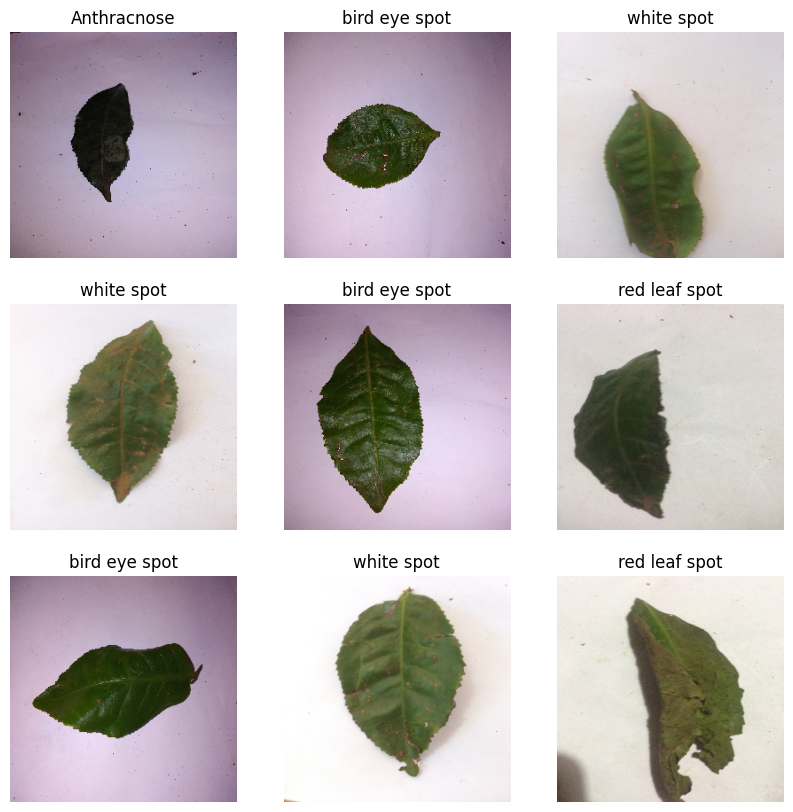

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
import tensorflow as tf

# Initialize the CNN model
cnn = tf.keras.models.Sequential()

# Convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Dropout layer to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

# Flatten layer to convert 2D matrices into a 1D vector
cnn.add(tf.keras.layers.Flatten())

# Fully connected layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer (3 units for 3 classes)
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,785,107 (29.70 MB)

 Trainable params: 7,785,107 (29.70 MB)

 Non-trainable params: 0 (0.00 B)

Found 359 files belonging to 3 classes.
Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 555ms/step - accuracy: 0.6746 - loss: 1.0213 - val_accuracy: 0.6056 - val_loss: 7.4111 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - accuracy: 0.8930 - loss: 0.2189 - val_accuracy: 0.4225 - val_loss: 19.0146 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step - accuracy: 0.9440 - loss: 0.1909 - val_accuracy: 0.4366 - val_loss: 33.5061 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 546ms/step - accuracy: 0.9581 - loss: 0.1652 - val_accuracy: 0.6197 - val_loss: 4.7184 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 0.9442 - loss: 0.1877 - val_accuracy: 0.6479 - val_loss: 2.1538 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 498ms/step - accuracy: 0.9671 - loss: 0.1245 - val_accuracy: 0.5775 - val_loss: 3.7694 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - accur

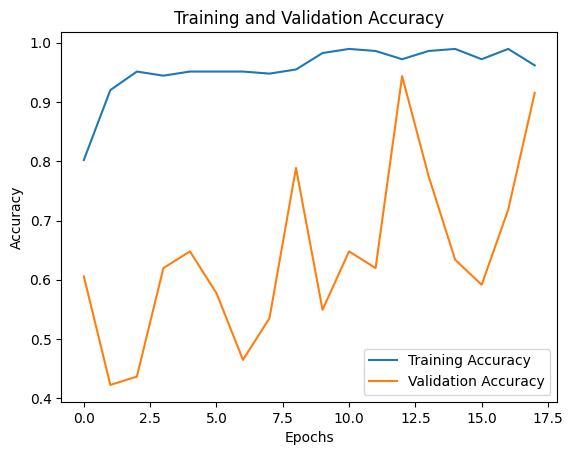

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt

# Specify the classes you want to load
class_names = ['healthy', 'red leaf spot', 'white spot']

# Load the dataset without splitting
batch_size = 32
image_size = (128, 128)

dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/tea sickness dataset',
    labels="inferred",
    label_mode="categorical",  # One-hot encoding for the labels
    class_names=class_names,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=123
)

# Create data augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    layers.RandomRotation(0.2),  # Randomly rotate images by 20%
    layers.RandomZoom(0.2),  # Randomly zoom images
    layers.RandomContrast(0.2),  # Randomly adjust contrast
])

# Apply data augmentation to the entire dataset
augmented_dataset = dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

# Split the augmented dataset into training (80%) and testing (20%) sets
dataset_size = len(augmented_dataset)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_dataset = augmented_dataset.take(train_size)
test_dataset = augmented_dataset.skip(train_size)

# Mish activation function
class Mish(layers.Layer):
    def init(self):
        super(Mish, self).init()

    def call(self, inputs):
        return inputs * tf.math.tanh(tf.math.softplus(inputs))

# Create a CNN model with Mish activation, Batch Normalization, and Dropout
model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation=None),
    layers.BatchNormalization(),  # Apply batch normalization
    Mish(),  # Apply Mish activation
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Apply smaller dropout for less regularization

    layers.Conv2D(64, (3, 3), activation=None),
    layers.BatchNormalization(),
    Mish(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation=None),
    layers.BatchNormalization(),
    Mish(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Adjust dropout rate

    layers.Flatten(),
    layers.Dense(128, activation=None),
    layers.BatchNormalization(),
    Mish(),
    layers.Dropout(0.3),  # Apply less dropout for regularization

    # Output layer
    layers.Dense(len(class_names), activation='softmax')
])

# Learning Rate Scheduler: Reduce the learning rate dynamically during training
lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

# Early Stopping: Stop training if validation loss does not improve for 5 epochs
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # Use RMSprop instead of Adam
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
    metrics=['accuracy']
)

# Train the model using the training dataset
history = model.fit(
    train_dataset,
    validation_data=test_dataset,  # Test set
    epochs=30,  # Increase epochs to give the model more time to learn
    callbacks=[lr_schedule, early_stopping],  # Add callbacks
    verbose=1
)

# Extract the final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
cnn.save('trained_plant_disease_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
class_name = dataset.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/tea sickness dataset',
    labels="inferred",
    label_mode="categorical",
    class_names= ['red leaf spot', 'white spot'],
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 285 files belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(285,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(285,), dtype=int64, numpy=
array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

      healthy       0.00      0.00      0.00       143
red leaf spot       0.04      0.04      0.04       142
   white spot       0.00      0.00      0.00         0

     accuracy                           0.02       285
    macro avg       0.01      0.01      0.01       285
 weighted avg       0.02      0.02      0.02       285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

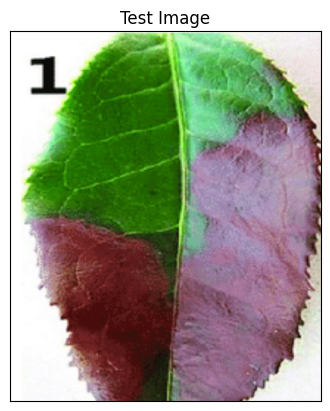

In [ ]:
import cv2
image_path = '/content/red_leaf_spot.png'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


In [ ]:
print(predictions)

[[3.1611023e-07 1.5061959e-08 9.9999964e-01]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


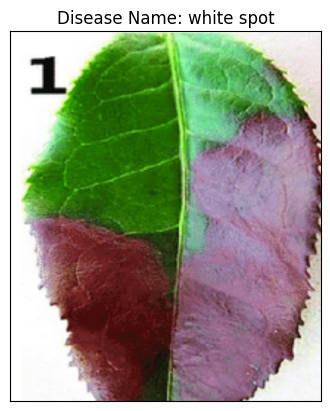

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

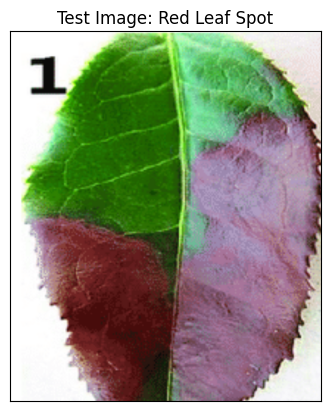

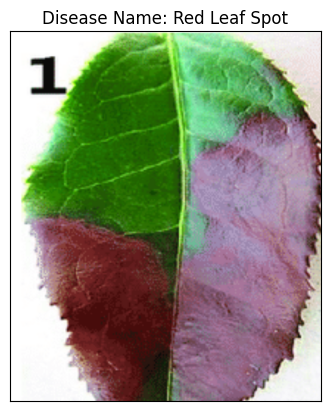

Recommended Solutions:
                     fertilizer                pesticide
0   Copper Oxychloride (50% Cu)                 Neem Oil
1   Copper Oxychloride (50% Cu)       Trichoderma viride
4        Zinc Sulphate (21% Zn)                 Neem Oil
5   Manganese Sulphate (24% Mn)  Pseudomonas fluorescens
6   Copper Oxychloride (50% Cu)                 Neem Oil
7   Manganese Sulphate (24% Mn)       Trichoderma viride
8     Potassium Nitrate (44% K)  Pseudomonas fluorescens
9        Zinc Sulphate (21% Zn)                 Neem Oil
10  Copper Oxychloride (50% Cu)       Trichoderma viride
11  Manganese Sulphate (24% Mn)                 Neem Oil
12    Potassium Nitrate (44% K)       Trichoderma viride
13  Copper Oxychloride (50% Cu)  Pseudomonas fluorescens


In [ ]:
# Import necessary libraries
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample Dataset of Tea Diseases with Fertilizers and Pesticides
tea_leaf_disease_management = [
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Neem Oil'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Zinc Sulphate (21% Zn)', 'pesticide': 'Neem Oil'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Pseudomonas fluorescens'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Neem Oil'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Potassium Nitrate (44% K)', 'pesticide': 'Pseudomonas fluorescens'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Zinc Sulphate (21% Zn)', 'pesticide': 'Neem Oil'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Neem Oil'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Potassium Nitrate (44% K)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'Red Leaf Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Pseudomonas fluorescens'},

    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Zinc Sulphate (21% Zn)', 'pesticide': 'Pseudomonas fluorescens'},
    {'disease': 'White Spot', 'fertilizer': 'Potassium Nitrate (44% K)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Zinc Sulphate (21% Zn)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Pseudomonas fluorescens'},
    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Potassium Nitrate (44% K)', 'pesticide': 'Pseudomonas fluorescens'},
    {'disease': 'White Spot', 'fertilizer': 'Zinc Sulphate (21% Zn)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Manganese Sulphate (24% Mn)', 'pesticide': 'Neem Oil'},
    {'disease': 'White Spot', 'fertilizer': 'Potassium Nitrate (44% K)', 'pesticide': 'Trichoderma viride'},
    {'disease': 'White Spot', 'fertilizer': 'Copper Oxychloride (50% Cu)', 'pesticide': 'Pseudomonas fluorescens'},
]

# Convert dataset to a pandas DataFrame
df = pd.DataFrame(tea_leaf_disease_management)

# Function to recommend fertilizer and pesticide based on disease
def recommend_solution(disease_name):
    recommendations = df[df['disease'] == disease_name]
    if recommendations.empty:
        return "No recommendations found for this disease."
    else:
        return recommendations[['fertilizer', 'pesticide']]

# Function to display the prediction and recommendation
def display_prediction_with_recommendations(img, predicted_disease):
    # Display the predicted disease name
    plt.imshow(img)
    plt.title(f"Disease Name: {predicted_disease}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Show fertilizer and pesticide recommendations
    recommendations = recommend_solution(predicted_disease)
    print("Recommended Solutions:")
    print(recommendations)

# Load and display the test image using OpenCV
image_path = '/content/red_leaf_spot.png'  # Update this with the actual path to your image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display with matplotlib

# Display the test image
plt.imshow(img)
plt.title('Test Image: Red Leaf Spot')
plt.xticks([])
plt.yticks([])
plt.show()

# Assuming you have a model that predicts the disease (here we use a placeholder)
predicted_disease = "Red Leaf Spot"  # This should be the output from your model

# Display the disease prediction and fertilizer recommendation
display_prediction_with_recommendations(img, predicted_disease)


In [ ]:
# Save the model as .h5
cnn.save('trained_plant_disease_model.h5')

# If you want to download it from Colab to your local machine, use this:
from google.colab import files
files.download('trained_plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>